We're going to do this from scratch again, since the model has changed massively since.

In [4]:
import pandas as pd
output = pd.read_csv("../output/output_original-20240218-165024.csv")
scores = output["score"]

import matplotlib.pyplot as plt

In [83]:
import numpy as np

s_losses = scores

exp_losses = np.exp(s_losses)

In [6]:
N = 1/sum(exp_losses)

In [7]:
tulip_probs = N * exp_losses

(array([4586.,  766.,  223.,   42.,   58.,   37.,   17.,   20.,   38.,
         359.]),
 array([4.21071969e-29, 1.41390541e-04, 2.82781083e-04, 4.24171624e-04,
        5.65562166e-04, 7.06952707e-04, 8.48343249e-04, 9.89733790e-04,
        1.13112433e-03, 1.27251487e-03, 1.41390541e-03]),
 <BarContainer object of 10 artists>)

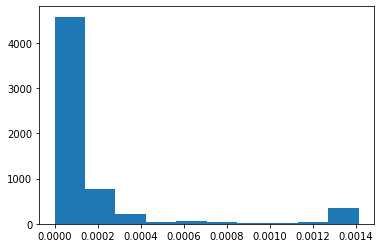

In [8]:
plt.hist(tulip_probs)

In [9]:
min(tulip_probs)

4.210719685866842e-29

Alternative approach: fit maximum to be 1

In [10]:
M = 1/ max(tulip_probs)

In [11]:
alt_tulip_probs = M * tulip_probs

(array([4586.,  766.,  223.,   42.,   58.,   37.,   17.,   20.,   38.,
         359.]),
 array([2.97807735e-26, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

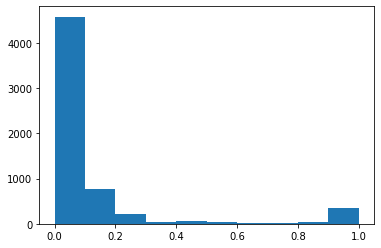

In [12]:
plt.hist(alt_tulip_probs)

In [13]:
pminus = min(alt_tulip_probs)

In [14]:
pplus = max(alt_tulip_probs)

In [15]:
def fit_params(kplus, kminus, pplus, pminus):
    """
    Returns the correct eta_tilde and eta for our model construction
    """

    eta = - (np.log(kplus) - np.log(kminus))/(np.log(pplus) - np.log(pminus))
    eta_tilde = kplus / (np.power(pplus, -eta))
    print(eta_tilde)
    eta_tilde = kminus / (np.power(pminus, -eta))
    print(eta_tilde)
    return eta, eta_tilde

def get_Kd_from_tulip_probs(tulip_probs, eta, eta_tilde):
    return eta_tilde * np.power(tulip_probs, -eta)


In [16]:
np.log(np.e)

1.0

In [17]:
fit_params(2,1,2,1)

1.0
1.0


(-1.0, 1.0)

In [18]:
eta, eta_tilde = fit_params(21.4, 0.015, pplus, pminus)

21.4
21.400000000000016


In [19]:
get_Kd_from_tulip_probs(pminus,eta, eta_tilde)

0.015

In [20]:
eta, eta_tilde

(-0.12357261624691045, 21.400000000000016)

In [21]:
Kds = get_Kd_from_tulip_probs(alt_tulip_probs, eta, eta_tilde)

(array([ 687.,  281.,  549.,  674.,  529.,  534.,  791., 1147.,  436.,
         518.]),
 array([1.50000e-02, 2.15350e+00, 4.29200e+00, 6.43050e+00, 8.56900e+00,
        1.07075e+01, 1.28460e+01, 1.49845e+01, 1.71230e+01, 1.92615e+01,
        2.14000e+01]),
 <BarContainer object of 10 artists>)

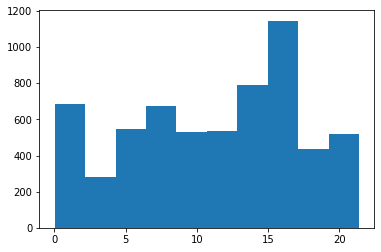

In [22]:
plt.hist(Kds)

In [23]:
def get_pbind_from_Kd(Kds, T_conc):
    return 1/(1+ (Kds/T_conc))

def get_pbind_from_tulip_probs(tulip_probs, eta, eta_tilde, T_conc):
    Kds = get_Kd_from_tulip_probs(tulip_probs, eta, eta_tilde)
    return get_pbind_from_Kd(Kds, T_conc)

Varying the free parameter for P_bind

(array([4719.,  566.,  184.,  142.,   79.,   75.,   81.,  112.,  113.,
          75.]),
 array([0.04464286, 0.13870074, 0.23275862, 0.3268165 , 0.42087438,
        0.51493227, 0.60899015, 0.70304803, 0.79710591, 0.89116379,
        0.98522167]),
 <BarContainer object of 10 artists>)

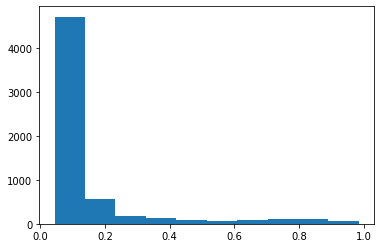

In [24]:
pbinds = get_pbind_from_Kd(Kds, 1)
plt.hist(pbinds)

(array([ 518.,  439., 1148.,  792.,  530.,  538.,  667.,  548.,  281.,
         685.]),
 array([0.99786457, 0.99807796, 0.99829136, 0.99850475, 0.99871814,
        0.99893153, 0.99914493, 0.99935832, 0.99957171, 0.99978511,
        0.9999985 ]),
 <BarContainer object of 10 artists>)

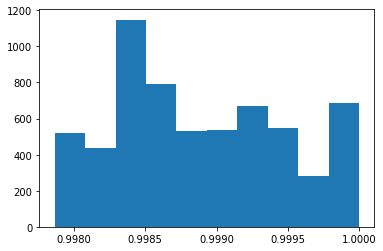

In [25]:
pbinds = get_pbind_from_Kd(Kds, 10000)
plt.hist(pbinds)

(array([6.042e+03, 6.600e+01, 1.900e+01, 6.000e+00, 9.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([4.67289698e-08, 6.70827832e-06, 1.33698277e-05, 2.00313770e-05,
        2.66929264e-05, 3.33544757e-05, 4.00160251e-05, 4.66775745e-05,
        5.33391238e-05, 6.00006732e-05, 6.66622225e-05]),
 <BarContainer object of 10 artists>)

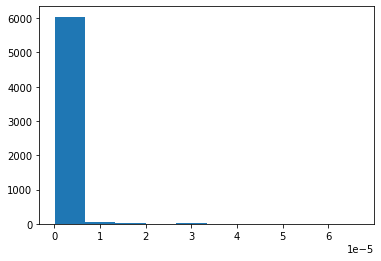

In [26]:
pbinds = get_pbind_from_Kd(Kds, 0.000001)
plt.hist(pbinds)

(array([1702., 1381.,  708.,  665.,  581.,  195.,  151.,  178.,  172.,
         413.]),
 array([0.31847134, 0.38647443, 0.45447752, 0.52248061, 0.5904837 ,
        0.65848679, 0.72648988, 0.79449297, 0.86249606, 0.93049916,
        0.99850225]),
 <BarContainer object of 10 artists>)

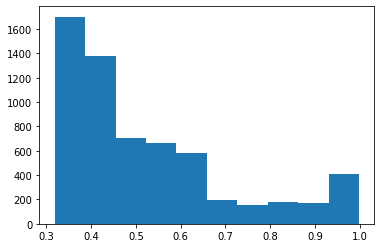

In [27]:
pbinds = get_pbind_from_Kd(Kds, 10)
plt.hist(pbinds)

(array([3732., 1233.,  282.,  154.,  140.,  102.,   86.,   96.,  156.,
         165.]),
 array([0.08547009, 0.17617866, 0.26688723, 0.35759581, 0.44830438,
        0.53901296, 0.62972153, 0.72043011, 0.81113868, 0.90184726,
        0.99255583]),
 <BarContainer object of 10 artists>)

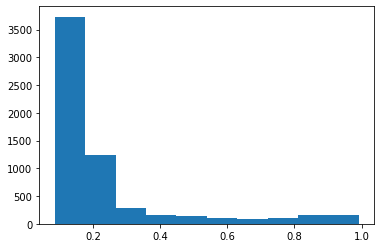

In [28]:
pbinds = get_pbind_from_Kd(Kds, 2)
plt.hist(pbinds)

1 or 2 seems reasonable here.

We don't need to fit $N$, so let us repeat the process, but with the unmodified tulip "probs"

(array([4586.,  766.,  223.,   42.,   58.,   37.,   17.,   20.,   38.,
         359.]),
 array([2.97668688e-26, 9.99533100e-02, 1.99906620e-01, 2.99859930e-01,
        3.99813240e-01, 4.99766550e-01, 5.99719860e-01, 6.99673170e-01,
        7.99626480e-01, 8.99579790e-01, 9.99533100e-01]),
 <BarContainer object of 10 artists>)

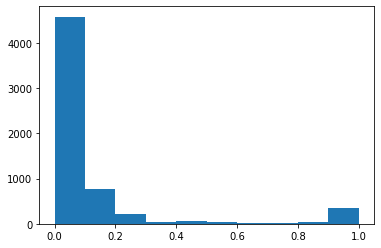

In [100]:
from binding_affinity_derivation import fit_params_and_get_pbind_from_tulip_probs

tulip_probs = np.exp(s_losses)

plt.hist(tulip_probs)

In [101]:
kplus = 21.4
kminus = 0.015

pbinds = fit_params_and_get_pbind_from_tulip_probs(tulip_probs, kplus, kminus, 1)

21.401235018289388
21.40123501828941


35757188741.54458
35757188741.544586
-0.4848837545429273
35757188741.544586


(array([20.,  7.,  7.,  4.,  1.,  3.,  3.,  2.,  3.,  4.]),
 array([1.50000e-02, 2.15350e+00, 4.29200e+00, 6.43050e+00, 8.56900e+00,
        1.07075e+01, 1.28460e+01, 1.49845e+01, 1.71230e+01, 1.92615e+01,
        2.14000e+01]),
 <BarContainer object of 10 artists>)

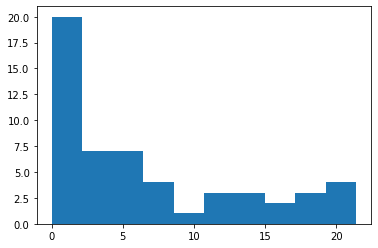

In [92]:
pplus = max(tulip_probs)
pminus = min(tulip_probs)

from binding_affinity_derivation import fit_params, get_Kd_from_tulip_probs

eta, eta_tilde = fit_params(kplus, kminus, pplus, pminus)
print(eta)
print(eta_tilde)
Kds = get_Kd_from_tulip_probs(tulip_probs, eta, eta_tilde)
plt.hist(Kds)

In [96]:
pbinds = get_pbind_from_tulip_probs(tulip_probs, eta, eta_tilde, 1)

(array([20., 10.,  4.,  2.,  3.,  2.,  3.,  6.,  2.,  2.]),
 array([0.04464286, 0.13870074, 0.23275862, 0.3268165 , 0.42087438,
        0.51493227, 0.60899015, 0.70304803, 0.79710591, 0.89116379,
        0.98522167]),
 <BarContainer object of 10 artists>)

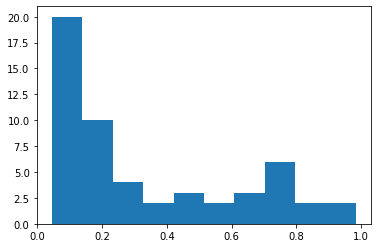

In [97]:
plt.hist(pbinds)

In [99]:
x = min(tulip_probs)
get_pbind_from_tulip_probs(x, eta, eta_tilde, 1)

0.9852216748768474

Indeed, as expected, normalising it or not does not change the output whatsoever

Now let us run the model on the dataset

11/05/24: The modification we need because our $\eta$ values were fundamentally incorrect. 

In [114]:
kplus = 21.4
kminus = 0.015

pbinds = fit_params_and_get_pbind_from_tulip_probs(tulip_probs, kminus, kplus, 1)

0.014999134382930471
0.014999134382930457


(array([4586.,  766.,  223.,   42.,   58.,   37.,   17.,   20.,   38.,
         359.]),
 array([2.97668688e-26, 9.99533100e-02, 1.99906620e-01, 2.99859930e-01,
        3.99813240e-01, 4.99766550e-01, 5.99719860e-01, 6.99673170e-01,
        7.99626480e-01, 8.99579790e-01, 9.99533100e-01]),
 <BarContainer object of 10 artists>)

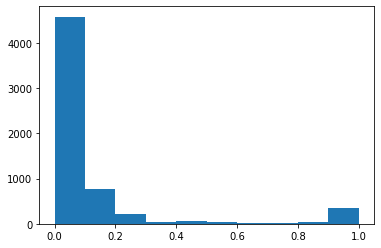

In [116]:
plt.hist(tulip_probs)

(array([4586.,  766.,  223.,   42.,   58.,   37.,   17.,   20.,   38.,
         359.]),
 array([2.97668688e-26, 9.99533100e-02, 1.99906620e-01, 2.99859930e-01,
        3.99813240e-01, 4.99766550e-01, 5.99719860e-01, 6.99673170e-01,
        7.99626480e-01, 8.99579790e-01, 9.99533100e-01]),
 <BarContainer object of 10 artists>)

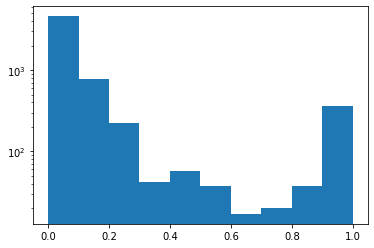

In [117]:
plt.hist(tulip_probs, log=True)

(array([  20.,   35.,   56.,   62.,   72.,   87.,   83.,  108.,  243.,
        5380.]),
 array([0.04464286, 0.13870074, 0.23275862, 0.3268165 , 0.42087438,
        0.51493227, 0.60899015, 0.70304803, 0.79710591, 0.89116379,
        0.98522167]),
 <BarContainer object of 10 artists>)

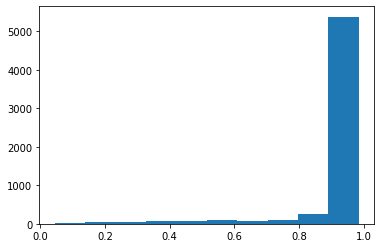

In [115]:
plt.hist(pbinds)